# BoomBikes Case Study

## About the Company

The company manages a bike-sharing system. It is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Problem Statement

<p>Due to Corona the profits have dipped since travel was affected worldwide. Now the company wants to understand what factors they can work on to make sure that demand for these shared bikes boost up once Corona is over.
The company wants to know:
<ul>
    <li> Which variables are significant in predicting the demand for shared bikes. </li>
    <li> 
How well those variables describe the bike demand</li>
</ul>
</p>

In [1]:
## Importing the required libraries for EDA
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike_data = pd.read_csv('day.csv')

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### It can be observed that there are no null values. Hence no need for any data imputation as of now.

## Data Dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Derived Metrics

- We can take out the day information. Maybe it can show the trend across a month. Instead of using daywise information we can use information like firsthalf of month or latter half of month. For these both single column is required ( 1 if month_firsthalf 0 if second half)
- Weathersit, season, mnth and weekday need to be encoded to string data before converting into numerical column since it can have a ordered distribution otherwise. These columns are not supposed to have any ordering

In [5]:
bike_data['day'] = pd.DatetimeIndex(bike_data.dteday, dayfirst=True).day

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [6]:
bike_data['month_firsthalf'] = [1 if (bike_data.iloc[i,16] <= 16) else 0 for i in range(bike_data.shape[0])]
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month_firsthalf
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1


In [7]:
## Before encoding weathersit let us first map it to better names from the data dictionary. This will help us during the inference part

def weathersit_map(x):
    return x.map({
        1: 'Clear',
        2 : 'Cloudy_Misty',
        3 : 'Light Rain',
        4 : 'Heavy Rain'
    })

def season_map(x):
    return x.map({
        1:'Spring', 
        2:'Summer', 
        3:'Fall', 
        4:'Winter'
    })

def month_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

def day_map(x):
    return x.map({
        6:'Mon',
        0:'Tue',
        1:'Wed',
        2:'Thu',
        3:'Fri',
        4:'Sat',
        5:'Sun',
    })

bike_data.weathersit = bike_data[['weathersit']].apply(weathersit_map)
bike_data.season = bike_data[['season']].apply(season_map)
bike_data.mnth = bike_data[['mnth']].apply(month_map)
bike_data.weekday = bike_data[['weekday']].apply(day_map)

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month_firsthalf
0,1,01-01-2018,Spring,0,Jan,0,Mon,0,Cloudy_Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2,02-01-2018,Spring,0,Jan,0,Tue,0,Cloudy_Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,1
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,1
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,1


In [8]:
bike_data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,month_firsthalf
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548,0.526027
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278,0.499664
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000,0.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000,1.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000,1.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000,1.000000


In [9]:
# Instant is just index column. It is better that we drop it. The dteday column and day column are also not needed anymore since we have extracted all the needed information from it
bike_data.drop(['instant','dteday','day'], axis = 1, inplace=True)

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_firsthalf
0,Spring,0,Jan,0,Mon,0,Cloudy_Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,Spring,0,Jan,0,Tue,0,Cloudy_Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [10]:
bike_data.weathersit.value_counts()

weathersit
Clear           463
Cloudy_Misty    246
Light Rain       21
Name: count, dtype: int64

In [11]:
bike_data.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

### EDA

Find relationships between variables and check for outliers

In [12]:
cat_cols = bike_data.select_dtypes(exclude=['int64','float64','datetime64']).columns
num_cols = bike_data.select_dtypes(include=['int64','float64']).columns
print("Categorical Columns")
print(cat_cols)
print ("Numerical Columns")
print(num_cols)

Categorical Columns
Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')
Numerical Columns
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month_firsthalf'],
      dtype='object')


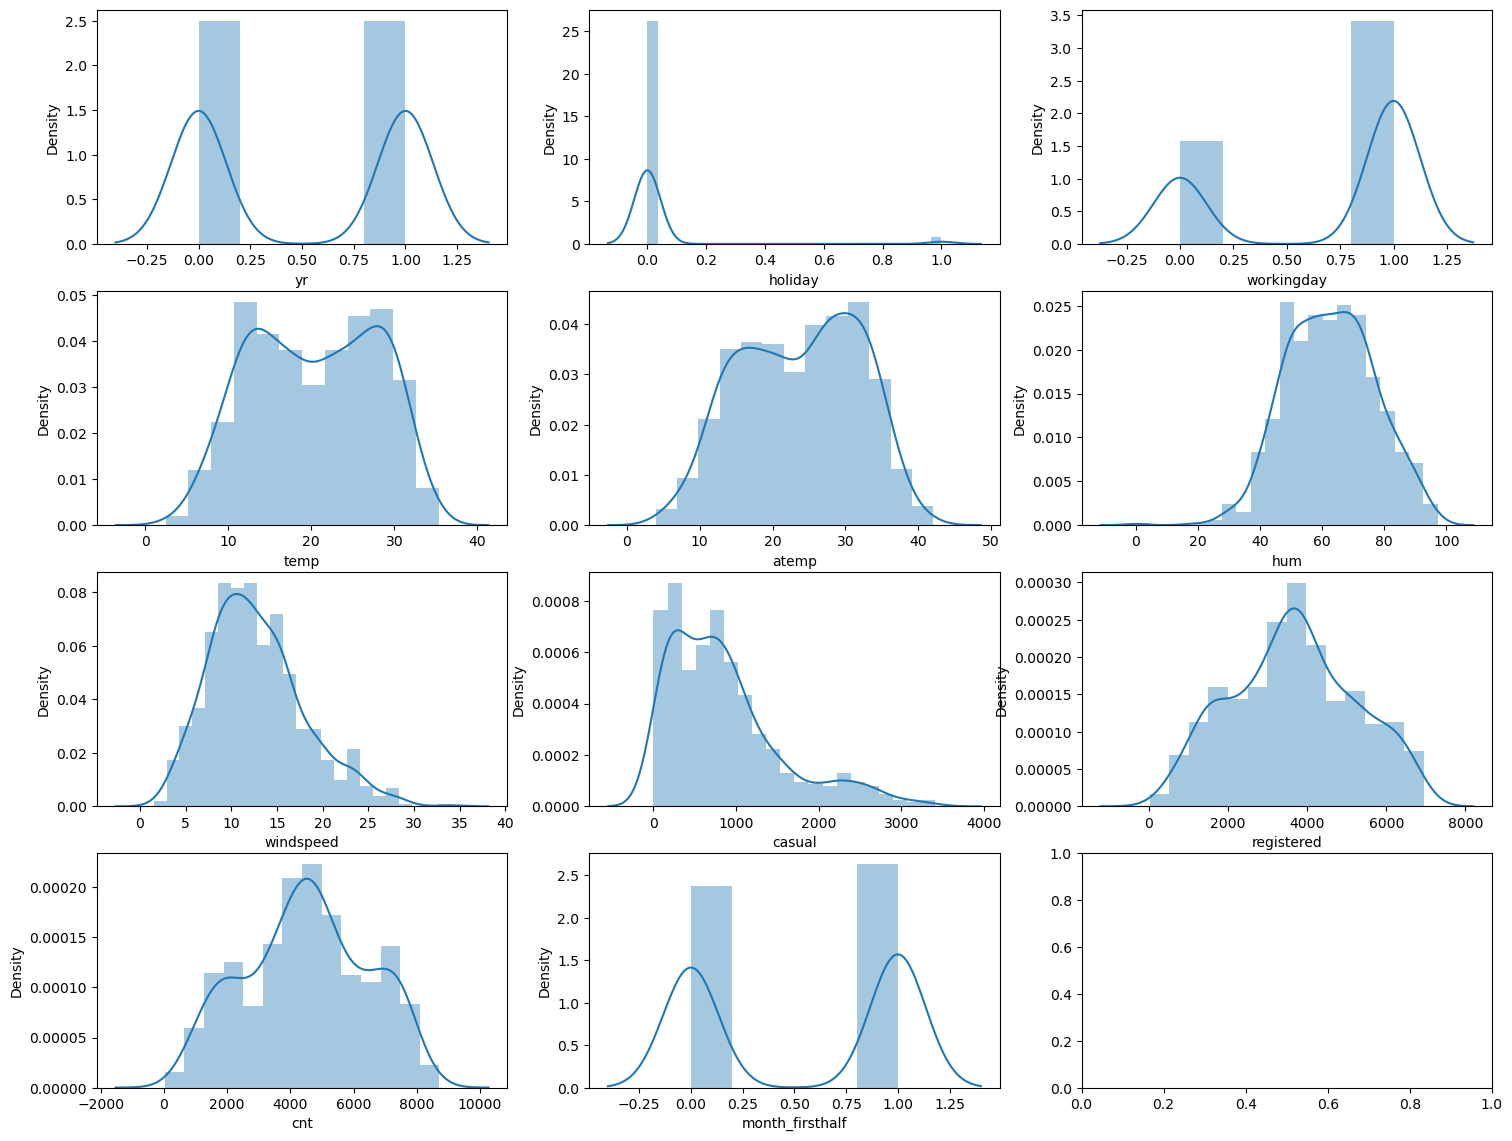

In [13]:
fig, ax = plt.subplots(ncols=3, nrows = 4, figsize = (18,14))
ind = 0
for i in range(4):
    for j in range(3):
        sns.distplot(bike_data[num_cols[ind]], ax = ax[i][j])
        ind+=1
        if(ind>10):
            break

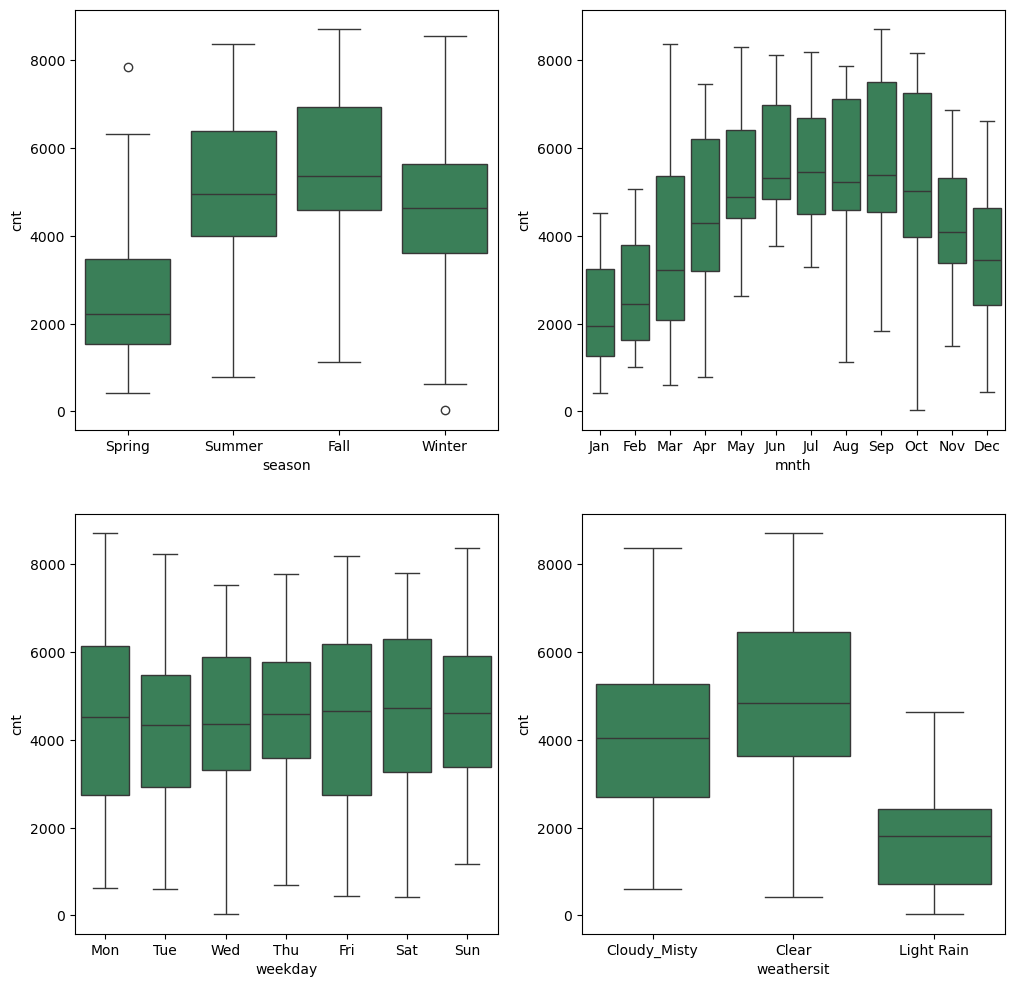

In [14]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (12,12))
ind = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = cat_cols[ind], y = 'cnt', data=bike_data, ax = ax[i][j], color ='seagreen')
        ind+=1

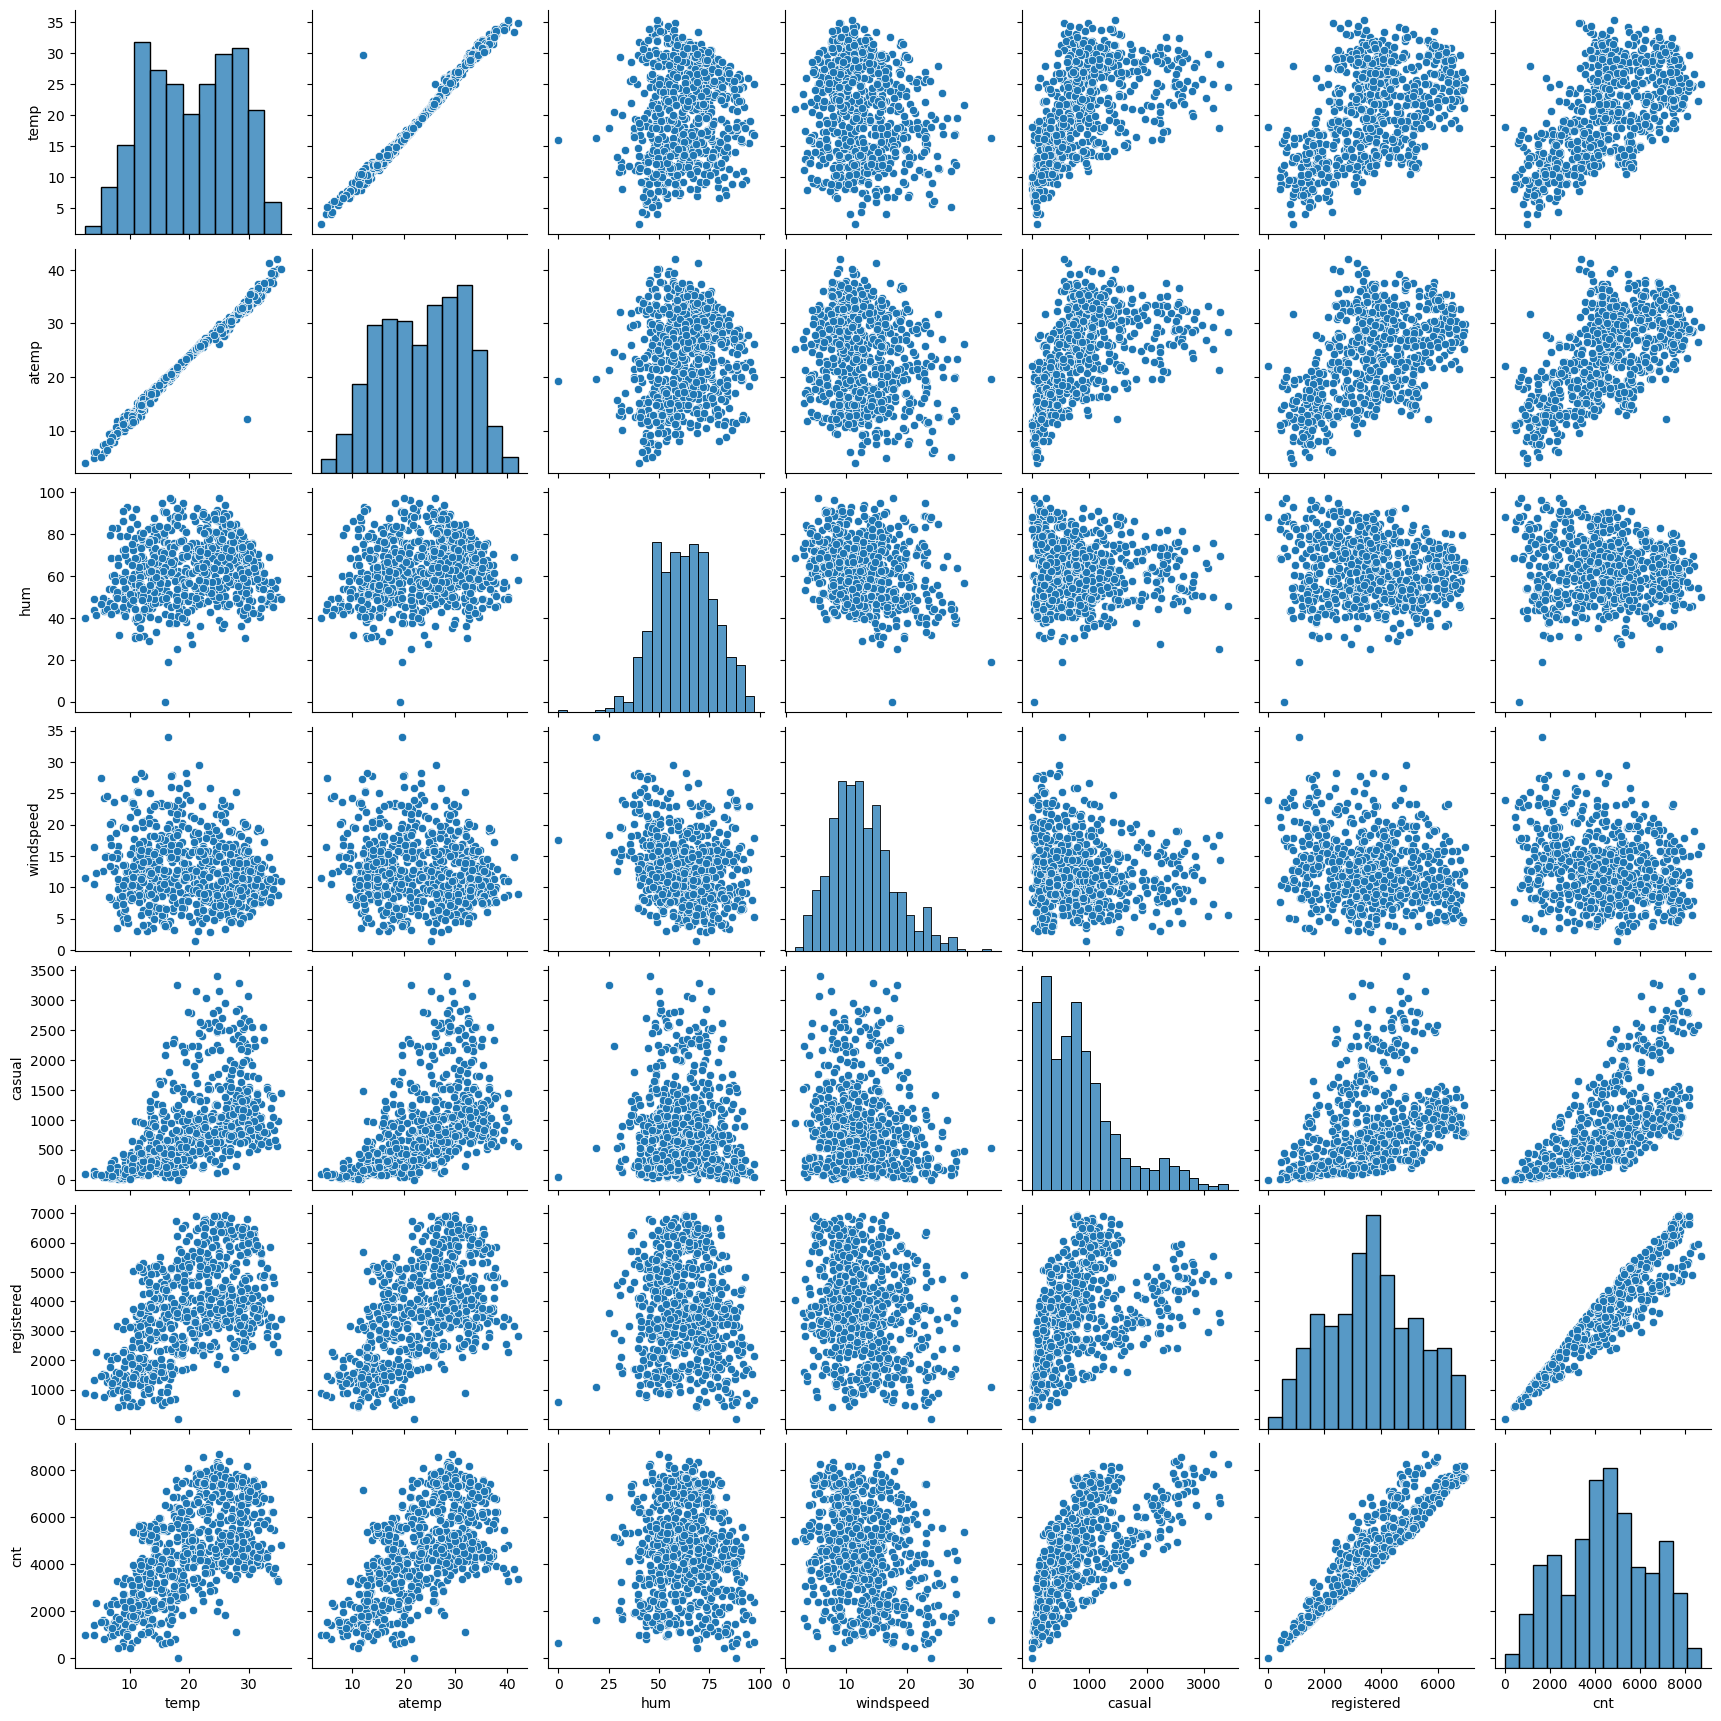

In [15]:
## Using all numerical data (excluding yr, holiday, month_firsthalf, workingday since these are just 0 1 values)
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

sns.pairplot(bike_data[numerical_cols])
plt.show()

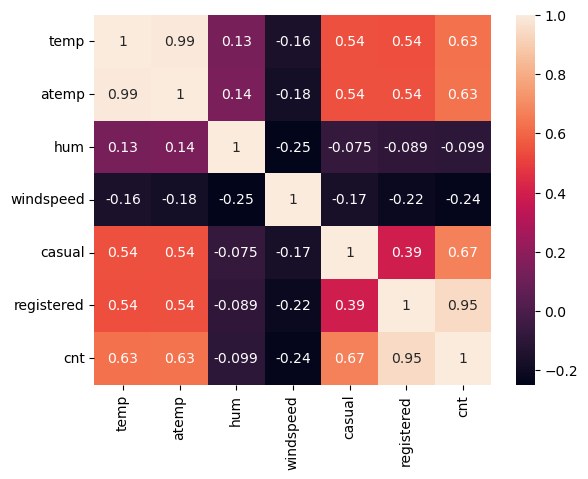

In [16]:
# Correlation Heat Map

sns.heatmap(bike_data[numerical_cols].corr(), annot=True)
plt.show()

### Findings

#### With the target variable(cnt)
- registered has a strong linear relationship (0.95 corr)
- temp,atemp and casual seems to follow a good linear trend (~0.6 corr)
- hum and windspeed dont seem to follow much linearity
- windspeed has a negative correlation of -0.24. So there is a slight possibility of higher windspeeds reducing the count of bikes taken

#### Within predictor variables
- temp and atemp seems to have a very high positive correlation. This might introduce multicollinearity
- temp and registered, atemp and registered seem to have good correlation.
- Thus atemp can be dropped to make sure we reduce the multicollinearity before we build the model

In [17]:
bike_data.drop('atemp', axis = 1, inplace=True)

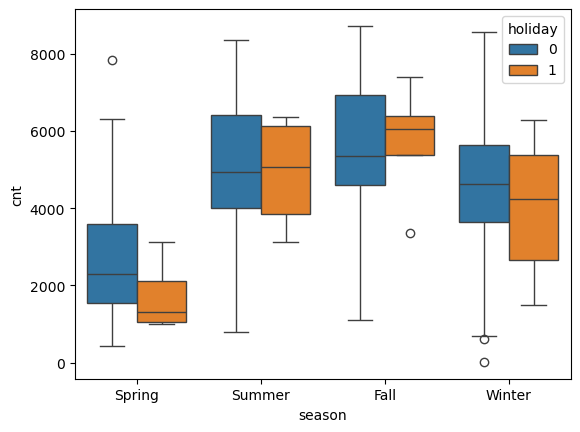

In [18]:
sns.boxplot(x = 'season', y ='cnt', hue = 'holiday', data = bike_data)
plt.show()

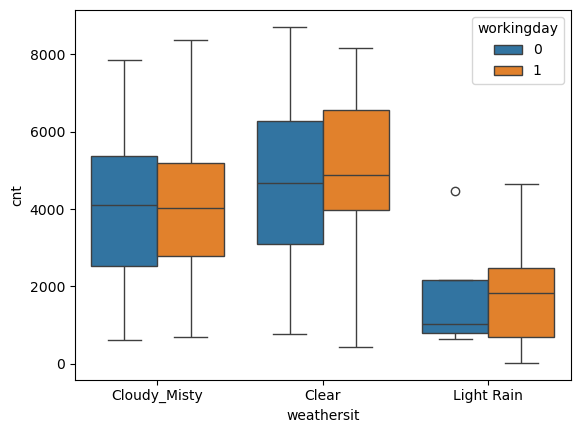

In [19]:
sns.boxplot(x = 'weathersit', y ='cnt', hue = 'workingday', data = bike_data)
plt.show()

### One Hot Encoding

Convert all the categorical columns to dummy variables using one hot encoding

In [20]:
bike_cats = pd.get_dummies(bike_data[cat_cols], drop_first=True, dtype=int)
bike_cats.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_Misty,weathersit_Light Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
## Attaching the dummy variables to the main df and then dropping the categorical variables

bike_data = pd.concat([bike_data, bike_cats], axis = 1)
bike_data.drop(cat_cols, axis = 1, inplace=True)

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   hum                      730 non-null    float64
 5   windspeed                730 non-null    float64
 6   casual                   730 non-null    int64  
 7   registered               730 non-null    int64  
 8   cnt                      730 non-null    int64  
 9   month_firsthalf          730 non-null    int64  
 10  season_Spring            730 non-null    int32  
 11  season_Summer            730 non-null    int32  
 12  season_Winter            730 non-null    int32  
 13  mnth_Aug                 730 non-null    int32  
 14  mnth_Dec                 7

#### The dataset is now ready to be used for model building

## Model Building

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

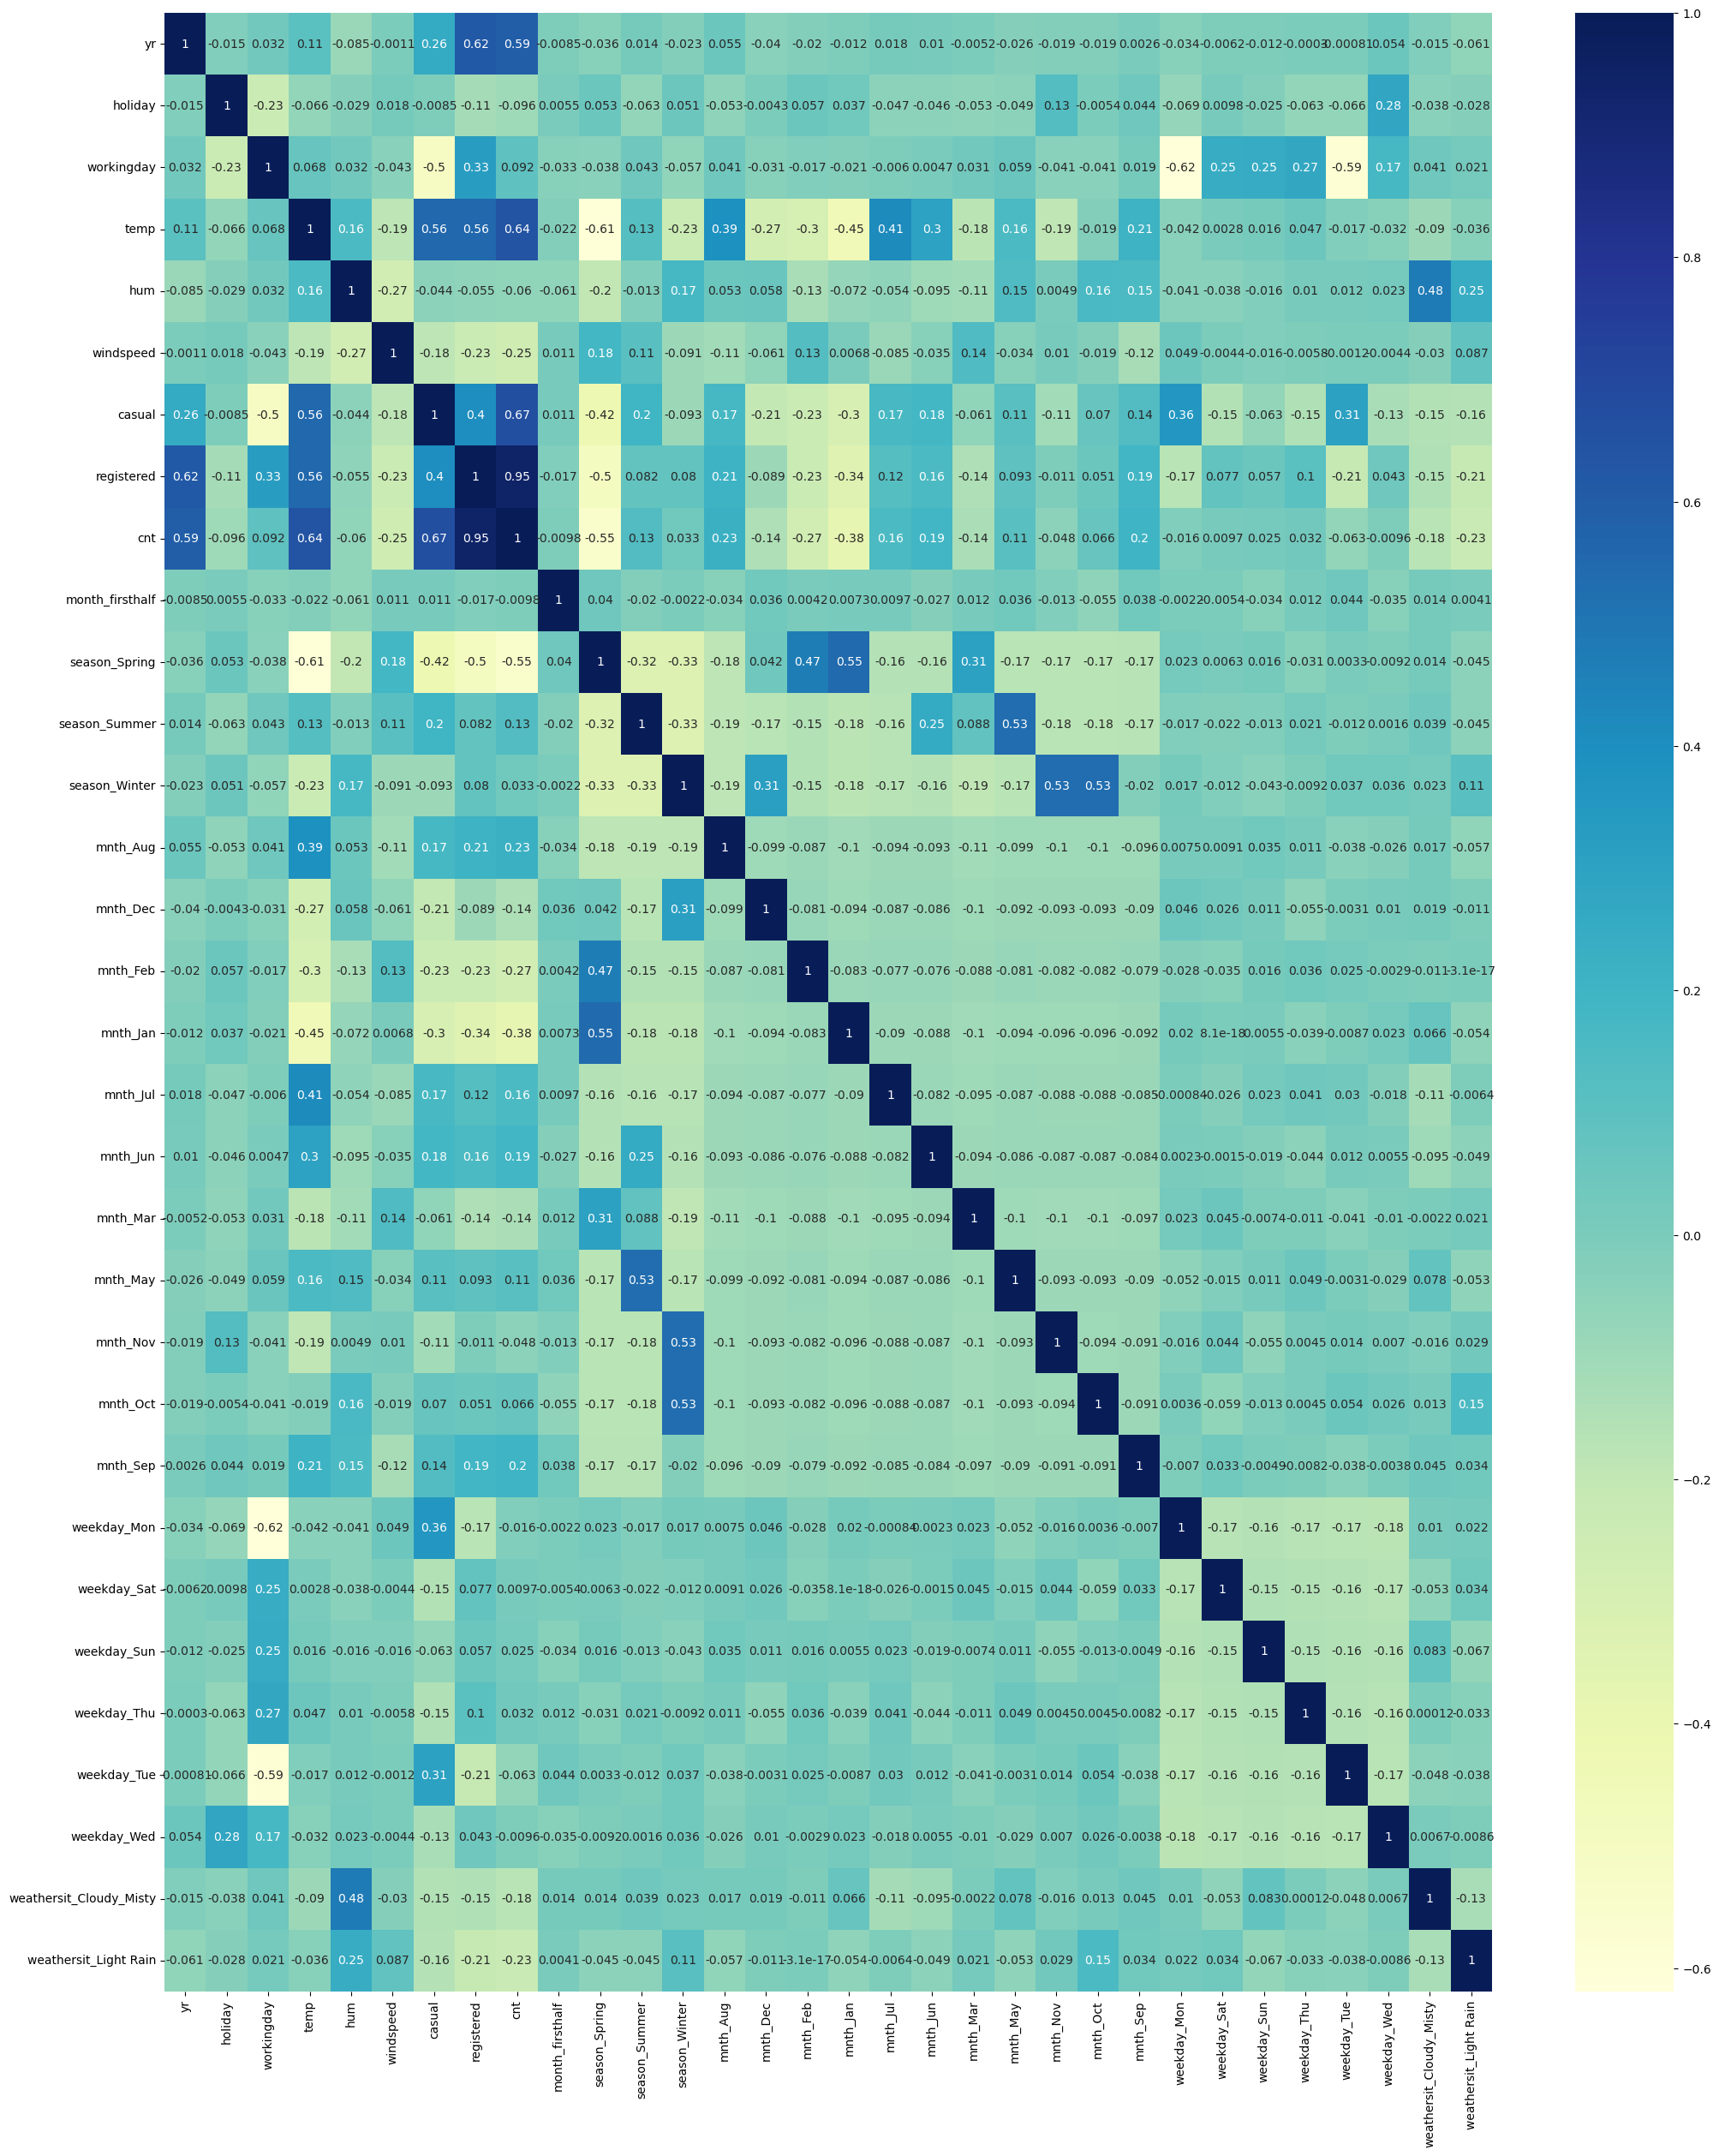

In [23]:
plt.figure(figsize = (25, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### temp variable still has higher correlation after registered and casual.

#### There are 2 ways of model building:
1. Predict 'cnt' variable using all the other variables directly (not considering casual and registered since their sum is cnt)
2. Predict casual with all other var and Predict registered with all other vars and then add them both to get 'cnt' variable.

Let us try both ways to see which performs better

### Scaling
Since the data doesnt seem to have any outliers, we can go ahead with MinMax Scaling safely since that is generally sensitive to outliers.
Since we are doing MinMax Scaling, scaling the columns which have just 0 and 1 doesnt make sense. Let us only apply scaling to the other columns

In [24]:
scaled = bike_data.columns[3:9]
print(scaled)

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train_unscaled = df_train.copy()
df_test_unscaled = df_test.copy()

df_train[scaled] = scaler.fit_transform(df_train[scaled])
df_test[scaled] = scaler.transform(df_test[scaled])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,month_firsthalf,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_Misty,weathersit_Light Rain
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0


#### Going ahead with step 1 which is directly predicting cnt variable

In [68]:
df_train_copy = df_train.copy()

y_train = df_train_copy.pop('cnt')
X_train = df_train_copy.drop(['casual','registered'], axis = 1)

##### Let us first fit the model with all variables. This will help us get a sense of the maximum R-squared value and would help us later in the feature selection process

In [69]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.52e-181
Time:                        22:13:31   Log-Likelihood:                 528.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     481   BIC:                            -875.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Findings:
- Maximum Rsquared value when all variables are used = 85.3%
- Around 17 variables seem to have p value significantly > 0.05

#### Thus lets start with RFE and include 29-17 = 12 + 2(the p values might change once we remove these many so lets keep 2 more) = 14 variables

In [70]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=14)            
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month_firsthalf', False, 13),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 14),
 ('weathersit_Cloudy_Misty', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [72]:
print("Top 14 columns selected by RFE")
print(X_train.columns[rfe.support_])

Top 14 columns selected by RFE
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weathersit_Cloudy_Misty',
       'weathersit_Light Rain'],
      dtype='object')


In [73]:
# Building model using the rfe suggested columns

cols = X_train.columns[rfe.support_]
X_train_new = X_train[cols]

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        22:13:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### The Rsquared value has not reduced much. It is 84.7% which is still great. The p-values for all attributes are also < 0.05
Let us proceed to check for Multicollinearity by using VIF values

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [75]:
get_vif(X_train_new)

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,season_Spring,4.24
8,season_Winter,3.44
7,season_Summer,2.83
12,weathersit_Cloudy_Misty,2.28
0,yr,2.08
11,weekday_Mon,1.97


The variable 'hum' has a very high vif factor. Let us remove it and fit the model again

In [76]:
X_train_new.drop('hum', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          5.73e-189
Time:                        22:13:35   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [77]:
get_vif(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_Spring,2.49
6,season_Summer,2.32
0,yr,2.07
7,season_Winter,1.99
10,weekday_Mon,1.96
8,mnth_Jul,1.58
11,weathersit_Cloudy_Misty,1.56


#### The 'temp' column seems to have a high VIF > 5. But since temp has a higher correlation with the dependent variable, let us try removing some other not so significant variable

In [78]:
X_train_new.drop('workingday', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.97e-187
Time:                        22:13:36   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [79]:
get_vif(X_train_new)

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_Summer,2.22
4,season_Spring,2.10
0,yr,2.07
6,season_Winter,1.80
7,mnth_Jul,1.58
10,weathersit_Cloudy_Misty,1.55
8,mnth_Sep,1.34
9,weekday_Mon,1.19


In [80]:
X_train_new.drop('weekday_Mon', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.40e-187
Time:                        22:13:38   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [81]:
get_vif(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.21
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.79
7,mnth_Jul,1.58
9,weathersit_Cloudy_Misty,1.55
8,mnth_Sep,1.34
10,weathersit_Light Rain,1.08


<b> The VIF value for temp is still just above 5. We can remove the next insignificant variable.</b>
The variable season Summer has the least absolute coefficient. Thus proceeding to remove it 

In [82]:
X_train_new.drop('season_Summer', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.16e-186
Time:                        22:13:42   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [83]:
get_vif(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_Spring,1.65
8,weathersit_Cloudy_Misty,1.51
5,season_Winter,1.40
6,mnth_Jul,1.35
7,mnth_Sep,1.20
9,weathersit_Light Rain,1.08
1,holiday,1.04


#### Now the VIF values are in the needed range <5. The p values for each column is 0. So this is a good fit.

In [84]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Sep,weathersit_Cloudy_Misty,weathersit_Light Rain
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,1,0


In [85]:
selected_cols = X_train_new.columns
print(selected_cols)

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Cloudy_Misty',
       'weathersit_Light Rain'],
      dtype='object')


#### The Rsquared value is pretty good - 83.3%

### Residual Analysis

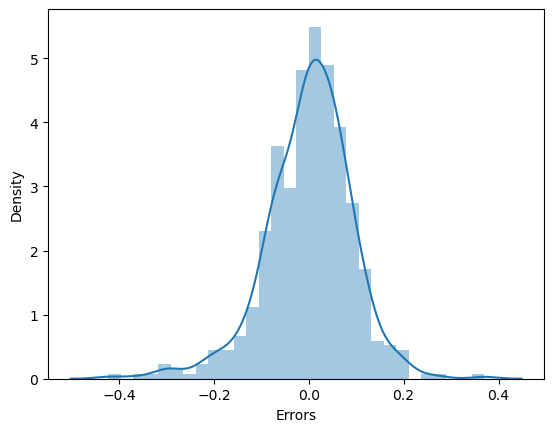

In [86]:
y_train_pred = lm.predict(X_train_sm)

sns.distplot((y_train - y_train_pred))
plt.xlabel('Errors')
plt.show()

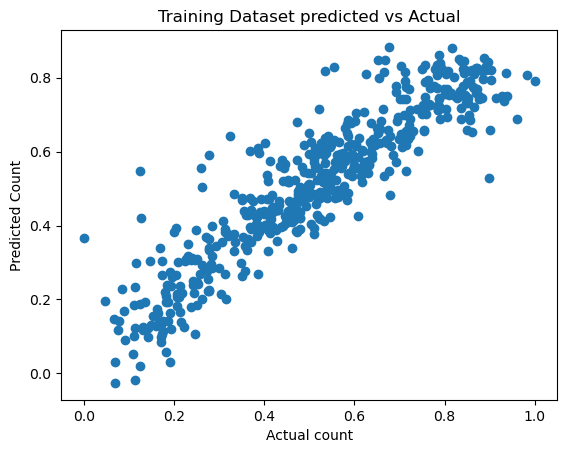

In [87]:
## Scatter plot
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual count')
plt.ylabel('Predicted Count')
plt.title('Training Dataset predicted vs Actual')
plt.show()

In [44]:
rfe_second = RFE(lr, n_features_to_select=8)            
rfe_second = rfe_second.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe_second.support_,rfe_second.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month_firsthalf', False, 19),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', False, 2),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 10),
 ('mnth_Feb', False, 11),
 ('mnth_Jan', False, 8),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 21),
 ('mnth_Mar', False, 22),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 9),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', False, 3),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 18),
 ('weekday_Sun', False, 14),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 15),
 ('weekday_Wed', False, 20),
 ('weathersit_Cloudy_Misty', False, 4),
 ('weathersit_Light Rain', True, 1)]

In [46]:
print("Top 8 columns selected by RFE")
print(X_train.columns[rfe_second.support_])

Top 8 columns selected by RFE
Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'mnth_Jul', 'weathersit_Light Rain'],
      dtype='object')


In [47]:
# Building model using the rfe suggested columns

cols = X_train.columns[rfe_second.support_]
X_train_new = X_train[cols]

X_train_sm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_sm).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          8.21e-179
Time:                        21:58:54   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.43

In [48]:
get_vif(X_train_new)

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
5,season_Spring,1.80
6,mnth_Jul,1.35
7,weathersit_Light Rain,1.11
1,holiday,1.03


#### VIF value is very high for hum column

In [49]:
X_train_new.drop('hum', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_sm).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          9.08e-169
Time:                        21:58:54   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [50]:
get_vif(X_train_new)

,Features,VIF
2,temp,3.95
3,windspeed,3.73
0,yr,2.03
4,season_Spring,1.50
5,mnth_Jul,1.26
6,weathersit_Light Rain,1.05
1,holiday,1.03


#### This model does not have a better Rsquared or Adj Rsquared (79%) than the other model. The VIF values are all below 5. The p values are also less than 0.05 for all variables. Though this model is lean, whether we want to sacrifice the drop of R2 squared value still remains a question. We can try to do predictions and residual analysis and check how well this generalizes to the test data. Then we can take a call

Chosen Variables:
1. yr
2. holiday
3. temp
4. windspeed
5. season_Spring
6. mnth_Jul
7. weathersit_Light Rain

Model Equation :
$ cnt = 0.2357  \times  yr -0.0748  \times  holiday + 0.4258 \times temp -0.1519 \times windspeed -0.1407 \times season_Spring -0.0726 \times mnth_Jul -0.2434 \times weathersit_Light Rain + 0.2627 $

### Residual Analysis

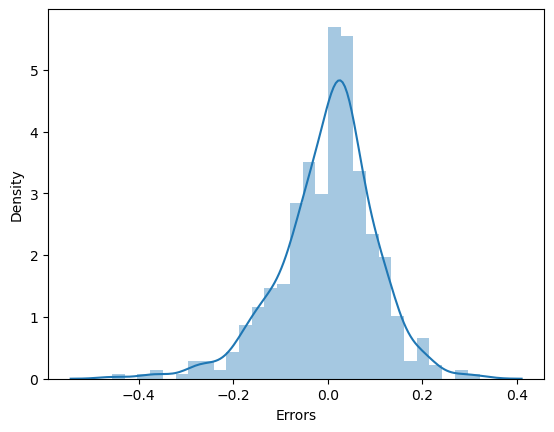

In [51]:
y_train_pred = lm2.predict(X_train_sm)

sns.distplot((y_train - y_train_pred))
plt.xlabel('Errors')
plt.show()

#### Almost follows a normal distribution which is centered at 0. Hence residual analysis shows that the assumption that the error terms follow a normal distribution is maintained

## Prediction

In [52]:
## df_test was already scaled. Let us verify once before splitting into X and y
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,month_firsthalf,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_Misty,weathersit_Light Rain
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,1,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,month_firsthalf,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_Misty,weathersit_Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.266372,0.527146,0.520592,0.534247,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.217246,0.217921,0.218435,0.499969,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.223712,0.526567,0.524275,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df_test_copy = df_test.copy()

y_test = df_test_copy.pop('cnt')
X_test = df_test_copy.drop(['casual','registered'], axis = 1)

In [55]:
## Choosing the variables chosen by our best performing and least complex model

X_test_new = X_test[['temp','windspeed','yr','season_Spring','mnth_Jul','weathersit_Light Rain','holiday']]

X_test_new.head()

,temp,windspeed,yr,season_Spring,mnth_Jul,weathersit_Light Rain,holiday
184,0.831783,0.084219,0,0,1,0,1
535,0.901354,0.153728,1,0,0,0,0
299,0.511964,0.334206,0,0,0,0,0
221,0.881625,0.339570,0,0,0,0,0
152,0.817246,0.537414,0,0,0,0,0


In [56]:
X_test_sm = sm.add_constant(X_test_new)
y_pred = lm2.predict(X_test_sm)

## Model Evaluation

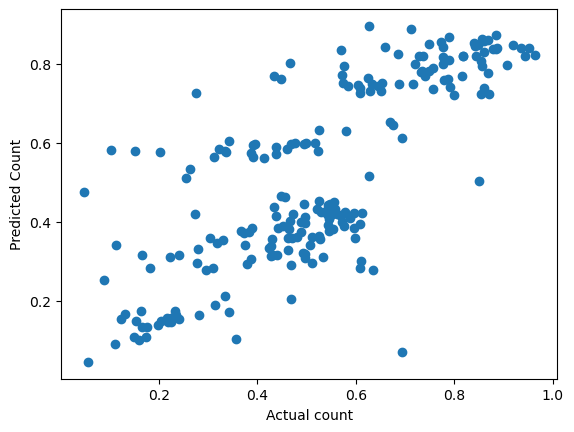

In [57]:
# Scatter Plot for actual cnt and predicted count. This will help us visualize how good the model has predicted on unseen test data

plt.scatter(y_test, y_pred)
plt.xlabel('Actual count')
plt.ylabel('Predicted Count')
plt.show()

The values seem to be scattered across not following a strict linear trend. Let us check the r-sqaured value on the test data to double confirm

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4978058985641224

#### The R2 value for the test predictions is very less (50%). So we cannot use this. <br> Let us try with the previously arrived model

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.16e-186
Time:                        21:58:55   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2519      0.024     10.530      0.000       0.205       0.299
yr                          0.2341      0.008     28.224      0.000       0.218       0.250
holiday                    -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                        0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                  -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_Spring              -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_Winter               0.0473      0.012      3.804      0.000       0.023       0.072
mnth_Jul                   -0.0727      0.017     -4.160      0.000      -0.107      -0.038
mnth_Sep                    0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_Cloudy_Misty    -0.0811      0.009     -9.182      0.000      -0.098      -0.064
weathersit_Light Rain      -0.2864      0.025    -11.499      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
selected_cols

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Cloudy_Misty',
       'weathersit_Light Rain'],
      dtype='object')

Train data R2 score = 83.3%.

Selected variables - 
1. yr
2. holiday
3. temp
4. windspeed
5. season_Spring
6. season_Winter
7. mnth_Jul
8. mnth_Sep
9. weathersit_Cloudy_Misty
10. weathersit_Light Rain

In [61]:
## Choosing the variables chosen by our 1st model

X_test_new = X_test[selected_cols]

X_test_new.head()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Sep,weathersit_Cloudy_Misty,weathersit_Light Rain
184,0,1,0.831783,0.084219,0,0,1,0,1,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [62]:
X_test_sm = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_sm)

In [63]:
r2_score(y_test, y_pred)

0.8070101019557963

#### The R2 value for this model on the test set is 80.7% which is just 3% lesser than on the training set. So we can say that this model is more generalized for the test as well. Let us choose this model as our final model

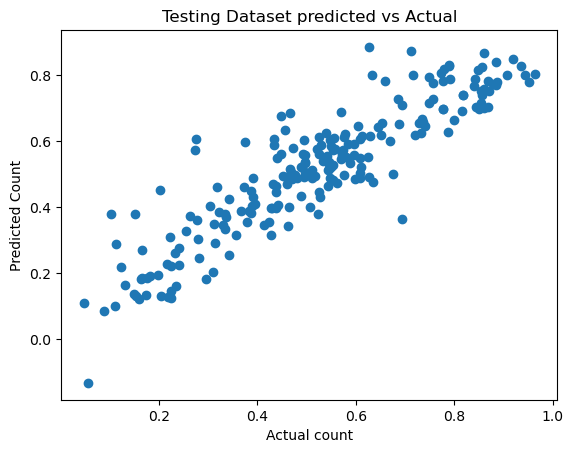

In [66]:
## Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual count')
plt.ylabel('Predicted Count')
plt.title('Testing Dataset predicted vs Actual')
plt.show()

The scatter plot seems to follow a good linear trend and the residual analysis also seems to ensure that the residuals follow a normal pattern with the mean near 0.

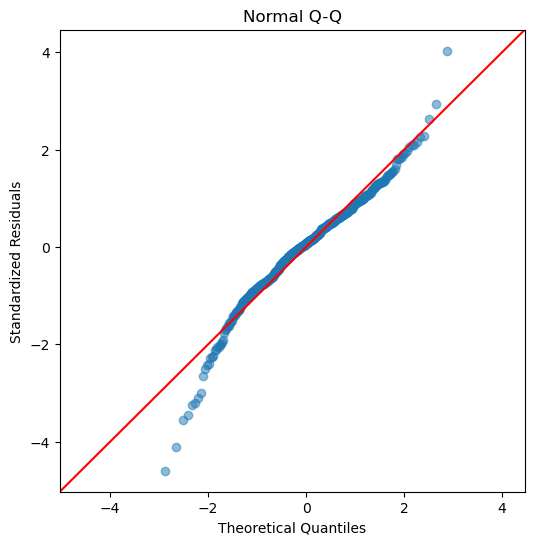

In [90]:
from statsmodels.api import ProbPlot, qqplot

QQ = ProbPlot(lm.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(6, 6)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

## METHOD 2
> Predicting registered and casual separately and then using their sum to get predicted cnt

#### Predicting casual column

In [57]:
df_train_copy = df_train.copy()

y_train = df_train_copy.pop('casual')
X_train = df_train_copy.drop(['cnt','registered'], axis = 1)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       510 non-null    int64  
 1   holiday                  510 non-null    int64  
 2   workingday               510 non-null    int64  
 3   temp                     510 non-null    float64
 4   hum                      510 non-null    float64
 5   windspeed                510 non-null    float64
 6   month_firsthalf          510 non-null    int64  
 7   season_Spring            510 non-null    int32  
 8   season_Summer            510 non-null    int32  
 9   season_Winter            510 non-null    int32  
 10  mnth_Aug                 510 non-null    int32  
 11  mnth_Dec                 510 non-null    int32  
 12  mnth_Feb                 510 non-null    int32  
 13  mnth_Jan                 510 non-null    int32  
 14  mnth_Jul                 510 n

In [59]:
X_train_sm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train,X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     54.42
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          4.87e-130
Time:                        10:51:43   Log-Likelihood:                 446.55
No. Observations:                 510   AIC:                            -835.1
Df Residuals:                     481   BIC:                            -712.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### The maximum possible R2 we can achieve is around 76%. <br><br> Let us try by removing some columns using RFE

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe_third = RFE(lr, n_features_to_select=10)            
rfe_third = rfe_third.fit(X_train, y_train)

In [61]:
cols = X_train.columns[rfe_third.support_]
X_train_new = X_train[cols]

X_train_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.16e-121
Time:                        10:51:51   Log-Likelihood:                 381.88
No. Observations:                 510   AIC:                            -743.8
Df Residuals:                     500   BIC:                            -701.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [62]:
get_vif(X_train_new)

,Features,VIF
1,workingday,26.25
7,weekday_Mon,6.64
8,weekday_Tue,6.37
0,holiday,1.90
3,hum,1.21
4,windspeed,1.15
9,weathersit_Light Rain,1.12
2,temp,1.08
6,mnth_Oct,1.08
5,season_Summer,1.07


In [63]:
X_train_new.drop('holiday', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.16e-121
Time:                        10:52:23   Log-Likelihood:                 381.88
No. Observations:                 510   AIC:                            -743.8
Df Residuals:                     500   BIC:                            -701.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [64]:
get_vif(X_train_new)

,Features,VIF
2,hum,16.74
0,workingday,14.45
1,temp,6.89
3,windspeed,4.29
6,weekday_Mon,4.00
7,weekday_Tue,3.85
4,season_Summer,1.42
5,mnth_Oct,1.18
8,weathersit_Light Rain,1.11


In [65]:
X_train_new.drop('hum', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          4.26e-116
Time:                        10:52:33   Log-Likelihood:                 366.84
No. Observations:                 510   AIC:                            -715.7
Df Residuals:                     501   BIC:                            -677.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [66]:
get_vif(X_train_new)

,Features,VIF
0,workingday,7.32
1,temp,6.26
2,windspeed,4.29
5,weekday_Mon,2.43
6,weekday_Tue,2.31
3,season_Summer,1.42
4,mnth_Oct,1.16
7,weathersit_Light Rain,1.07


In [67]:
X_train_new.drop('workingday', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_sm).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.85e-114
Time:                        10:52:40   Log-Likelihood:                 359.96
No. Observations:                 510   AIC:                            -703.9
Df Residuals:                     502   BIC:                            -670.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [68]:
get_vif(X_train_new)

,Features,VIF
0,temp,2.85
1,windspeed,2.84
2,season_Summer,1.42
4,weekday_Mon,1.20
5,weekday_Tue,1.19
3,mnth_Oct,1.15
6,weathersit_Light Rain,1.07


#### We have arrived at an average performing model having R2 value as 66.3%. This is not very bad. Let us check predictions on this and whether this model generalizes well with the test dataset as well

In [69]:
X_train_new.head()

,temp,windspeed,season_Summer,mnth_Oct,weekday_Mon,weekday_Tue,weathersit_Light Rain
653,0.509887,0.300794,0,1,0,0,0
576,0.815169,0.264686,0,0,0,0,0
426,0.442393,0.255342,0,0,1,0,0
728,0.245101,0.663106,0,0,0,1,0
482,0.395666,0.188475,1,0,1,0,0


In [70]:
df_test_copy = df_test.copy()

y_test = df_test_copy.pop('casual')
X_test = df_test_copy.drop(['cnt','registered'], axis = 1)

In [71]:
X_test_new = X_test[X_train_new.columns]

X_test_new.head()

,temp,windspeed,season_Summer,mnth_Oct,weekday_Mon,weekday_Tue,weathersit_Light Rain
184,0.831783,0.084219,0,0,0,0,0
535,0.901354,0.153728,1,0,0,0,0
299,0.511964,0.334206,0,1,0,0,0
221,0.881625,0.339570,0,0,0,0,0
152,0.817246,0.537414,1,0,0,0,0


In [72]:
X_test_sm = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_sm)

In [73]:
r2_score(y_test,y_pred)

0.5721519713515758

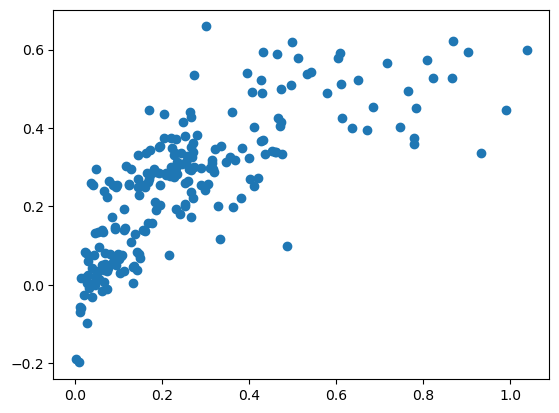

In [74]:
plt.scatter(y_test, y_pred)

#### The R2 on the testset seems to be average only 57%. Still lets see if we can use this to do a decent enough prediction

In [75]:
## Invert transformation on the predicted values to use later:
max_train = max(df_train_unscaled['casual'])
min_train = min(df_train_unscaled['casual'])

y_pred_casual_count = min_train + y_pred * (max_train - min_train)
print(y_pred_casual_count[:5])

184    1106.106797
535    1445.618124
299     732.907103
221    1074.623237
152    1142.411605
dtype: float64


### Model building and Prediction on registered column

In [37]:
df_train_copy = df_train.copy()

y_train = df_train_copy.pop('registered')
X_train = df_train_copy.drop(['cnt','casual'], axis = 1)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       510 non-null    int64  
 1   holiday                  510 non-null    int64  
 2   workingday               510 non-null    int64  
 3   temp                     510 non-null    float64
 4   hum                      510 non-null    float64
 5   windspeed                510 non-null    float64
 6   month_firsthalf          510 non-null    int64  
 7   season_Spring            510 non-null    int32  
 8   season_Summer            510 non-null    int32  
 9   season_Winter            510 non-null    int32  
 10  mnth_Aug                 510 non-null    int32  
 11  mnth_Dec                 510 non-null    int32  
 12  mnth_Feb                 510 non-null    int32  
 13  mnth_Jan                 510 non-null    int32  
 14  mnth_Jul                 510 n

In [39]:
X_train_sm = sm.add_constant(X_train)
lm4 = sm.OLS(y_train,X_train_sm).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.13e-186
Time:                        09:29:23   Log-Likelihood:                 534.42
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     481   BIC:                            -888.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Using all the varaibles we are getting an R2score of 86% which is good enough. Let us use RFE to select top few features and compare the model's behaviour

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe_fourth = RFE(lr, n_features_to_select=12)            
rfe_fourth = rfe_fourth.fit(X_train, y_train)

In [42]:
cols = X_train.columns[rfe_fourth.support_]
X_train_new = X_train[cols]

X_train_sm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_sm).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     239.0
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.47e-197
Time:                        10:18:13   Log-Likelihood:                 518.15
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     497   BIC:                            -955.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##### Seems like the Rsquared has not dropped that much. It is still 85%. The p value for holiday is high so we shall remove it

In [43]:
X_train_new.drop('holiday', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_sm).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     259.5
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          3.56e-198
Time:                        10:20:02   Log-Likelihood:                 516.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     498   BIC:                            -958.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
get_vif(X_train_new)

,Features,VIF
3,hum,22.85
2,temp,15.57
4,windspeed,4.03
1,workingday,3.02
5,season_Spring,2.55
9,weathersit_Cloudy_Misty,2.23
6,season_Winter,2.08
0,yr,2.06
7,mnth_Jul,1.40
8,mnth_Sep,1.20


In [45]:
X_train_new.drop('hum', axis = 1, inplace=True)
X_train_sm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_sm).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     276.9
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.95e-196
Time:                        10:20:40   Log-Likelihood:                 509.70
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     499   BIC:                            -950.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [46]:
get_vif(X_train_new)

,Features,VIF
2,temp,5.63
3,windspeed,4.02
1,workingday,2.95
0,yr,2.06
4,season_Spring,1.71
8,weathersit_Cloudy_Misty,1.53
5,season_Winter,1.40
6,mnth_Jul,1.36
7,mnth_Sep,1.20
9,weathersit_Light Rain,1.08


#### We know that temp has a good correlation with the registered column. So instead of removing it and losing out on the predictive power, let us remove some other variable and check if vif changes with that without losing much in Rsquared value

In [49]:
X_train_new_check = X_train_new.drop('mnth_Jul', axis = 1)
get_vif(X_train_new_check)

,Features,VIF
2,temp,4.64
3,windspeed,3.96
1,workingday,2.94
0,yr,2.06
4,season_Spring,1.71
7,weathersit_Cloudy_Misty,1.51
5,season_Winter,1.38
6,mnth_Sep,1.15
8,weathersit_Light Rain,1.08


In [50]:
X_train_sm = sm.add_constant(X_train_new_check)
lm4 = sm.OLS(y_train,X_train_sm).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     300.5
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.41e-195
Time:                        10:29:25   Log-Likelihood:                 504.16
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     500   BIC:                            -946.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Prediction

In [51]:
df_test_copy = df_test.copy()

y_test = df_test_copy.pop('registered')
X_test = df_test_copy.drop(['cnt','casual'], axis = 1)

In [52]:
X_test_new = df_test[X_train_new_check.columns]

X_test_new.head()

,yr,workingday,temp,windspeed,season_Spring,season_Winter,mnth_Sep,weathersit_Cloudy_Misty,weathersit_Light Rain
184,0,0,0.831783,0.084219,0,0,0,1,0
535,1,1,0.901354,0.153728,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,1,0
221,0,1,0.881625,0.339570,0,0,0,0,0
152,0,1,0.817246,0.537414,0,0,0,0,0


In [54]:
X_test_sm = sm.add_constant(X_test_new)
y_pred = lm4.predict(X_test_sm)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.813757236586964

In [ ]:
plt.scatter(y_test,y_pred)

#### The R2 score on the test data is also great 81%. Hence this is a good model which generalizes well on the test dataset as well.

Let us invert the scaling to get the actual predicted values

In [56]:
## Invert transformation on the predicted values to use later:
max_train = max(df_train_unscaled['registered'])
min_train = min(df_train_unscaled['registered'])

y_pred_regis_count = min_train + y_pred * (max_train - min_train)
print(y_pred_regis_count[:5])

184    2684.312451
535    6069.647500
299    3265.130581
221    4122.287299
152    3810.739784
dtype: float64


In [77]:
## Adding pred on casual and pred on registered to get total predicted cnt

y_pred_cnt = y_pred_casual_count + y_pred_regis_count
y_pred_cnt[:5]

184    3790.419248
535    7515.265624
299    3998.037684
221    5196.910535
152    4953.151389
dtype: float64

In [81]:
# Scaling this value back to help us compare with the actual cnt values
max_cnt_train = max(df_train_unscaled['cnt'])
min_cnt_train = min(df_train_unscaled['cnt'])

y_pred_scaled = (y_pred_cnt - min_cnt_train)/(max_cnt_train - min_cnt_train)
y_pred_scaled[:5]

184    0.433550
535    0.862088
299    0.457436
221    0.595365
152    0.567321
dtype: float64

In [82]:
r2_score(df_test['cnt'], y_pred_scaled)

0.8043046600419552

#### This performs with a very good R2 score value - 80.4%. So predicting casual separately and predicting registered separately and then adding both up to predict the cnt variable seems to be a a different approach but it does not provide that much better predictions nevertheless. Surely this increases complexity where we have 2 models instead of 1.

## CONCLUSION

The R2 score for the first model on the test set was 80.7 and on the training set was 83%. So this is a very good model. Let us conclude by taking the model first built and use that going forward to predict any new values of cnt.

Model Equation :
$ cnt = 0.2341  \times  yr -0.0986  \times  holiday + 0.4515 \times temp -0.1398 \times windspeed -0.1108 \times Spring + 0.0473 \times Winter -0.0727 \times mnth Jul + 0.0577 \times mnth Sep -0.0811 \times weathersit Cloudy Misty -0.2864 \times weathersit Light Rain + 0.2519 $

According to the equation the top 3 variables which can heavily influence the rental - 
1. temp - Temperature is a highly influential variable which has a positive coefficient. This means rentals increases with an increase in temperature provided the other variables are kept constant.
2. Weather Light Rain - This is the second most influential variable but has a negative coefficient. This means that if the weather is Light Rain then there is a lesser chance of rentals to be taken
3. yr - This has a positive coefficient. This means that the year being 2019 has a higher chance of rentals being more.

In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.16e-186
Time:                        19:50:20   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2519      0.024     10.530      0.000       0.205       0.299
yr                          0.2341      0.008     28.224      0.000       0.218       0.250
holiday                    -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                        0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                  -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_Spring              -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_Winter               0.0473      0.012      3.804      0.000       0.023       0.072
mnth_Jul                   -0.0727      0.017     -4.160      0.000      -0.107      -0.038
mnth_Sep                    0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_Cloudy_Misty    -0.0811      0.009     -9.182      0.000      -0.098      -0.064
weathersit_Light Rain      -0.2864      0.025    -11.499      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""